
Top correlated features with Total CO2 Emissions:
 Emissions.Production.CO2.Total                                      1.000000
Data.Infrastructure.Telephone Lines                                 0.954405
Country.GDP                                                         0.952614
Data.Rural Development.Agricultural Land                            0.727113
Data.Infrastructure.Mobile Cellular Subscriptions                   0.696946
Data.Rural Development.Land Area                                    0.657229
Data.Rural Development.Surface Area                                 0.653275
Country.Population                                                  0.639367
Data.Rural Development.Rural Population                             0.495892
Data.Infrastructure.Telephone Lines per 100 People                  0.189238
Data.Health.Life Expectancy at Birth, Male                          0.128237
Data.Health.Life Expectancy at Birth, Total                         0.118309
Data.Health.Life Expecta

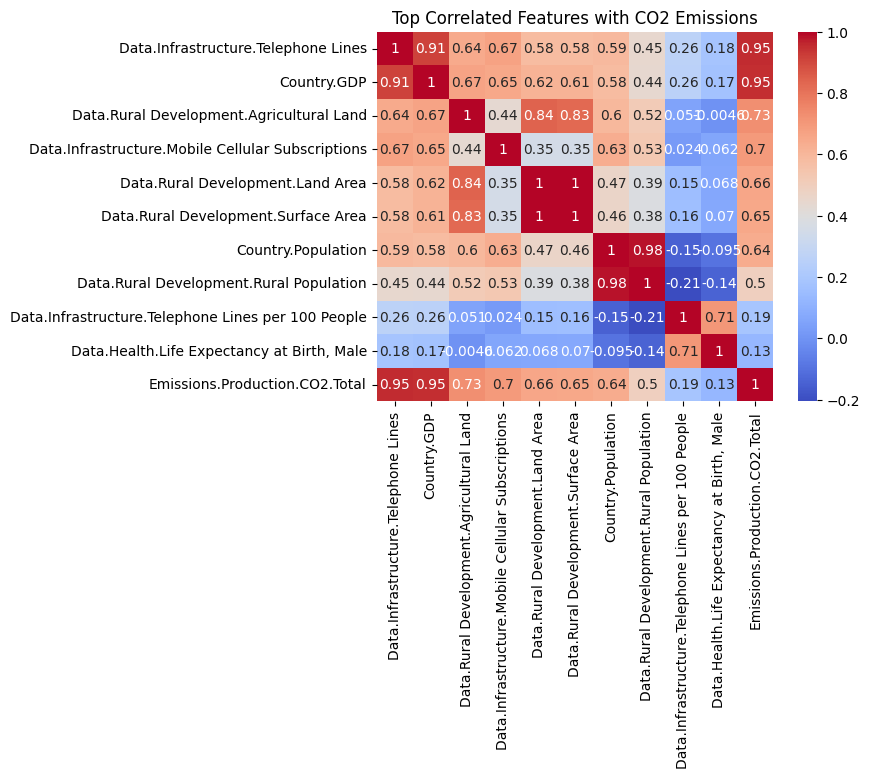


R² Score on Test Data: 0.961

Feature Weights (Linear Regression Coefficients):
 Data.Infrastructure.Telephone Lines                   521.036642
Data.Rural Development.Surface Area                   422.179479
Country.GDP                                           394.834542
Country.Population                                    162.601250
Data.Rural Development.Agricultural Land              125.103888
Data.Infrastructure.Mobile Cellular Subscriptions      13.568614
Data.Health.Life Expectancy at Birth, Male             12.290258
Data.Infrastructure.Telephone Lines per 100 People    -66.174904
Data.Rural Development.Rural Population              -132.291978
Data.Rural Development.Land Area                     -402.071580
dtype: float64


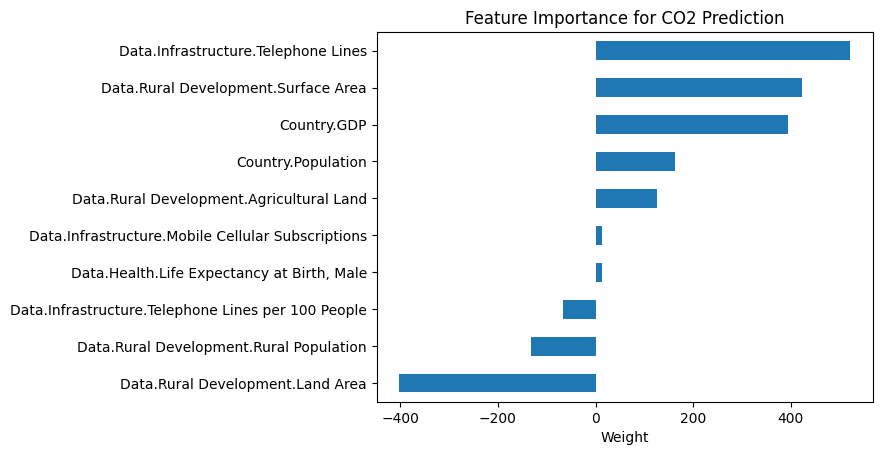

Fold 1: R² Score = 0.9607
Fold 2: R² Score = 0.9689
Fold 3: R² Score = 0.9278
Fold 4: R² Score = 0.9532
Fold 5: R² Score = 0.9552

Average R² Score: 0.9531


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

#Loaded the dataset
df = pd.read_csv('/content/merged_dataset (1).csv')

# Filtered columns to create a dataset with only the columns of interest
columns_to_keep = 'Emissions.Production.CO2.Total'
emission_cols = [col for col in df.columns if 'emission' in col.lower() and col != columns_to_keep]
df = df.drop(columns=emission_cols)
df.drop(columns=[
    'Data.Rural Development.Rural Population Growth',
    'Data.Health.Population Growth',
    'Data.Urban Development.Urban Population Percent Growth',
    'Data.Urban Development.Urban Population Percent',
    'Data.Rural Development.Agricultural Land Percent',
    'Data.Rural Development.Arable Land Percent'
], inplace=True)

# Found the correlations between all variables and emissions
correlation = df.corr(numeric_only=True)
co2_corr = correlation['Emissions.Production.CO2.Total'].sort_values(ascending=False)
print("\nTop correlated features with Total CO2 Emissions:\n", co2_corr)

# Plotted correlation heatmap
top_corr_features = co2_corr[1:11].index
sns.heatmap(df[top_corr_features.tolist() + ['Emissions.Production.CO2.Total']].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with CO2 Emissions')
plt.show()

# Prepared data for regression model
X = df[top_corr_features]
y = df['Emissions.Production.CO2.Total']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data was split into training and testing sets (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Made predictions on test data and evaluated the model and printed R squared value
y_pred = model.predict(X_test)
print(f"\nR² Score on Test Data: {r2_score(y_test, y_pred):.3f}")

# Feature weights (positive weight means that feature is associated with higher CO2 emissions)
coefficients = pd.Series(model.coef_, index=top_corr_features)
print("\nFeature Weights (Linear Regression Coefficients):\n", coefficients.sort_values(ascending=False))

# Created bar plot of the feature weights
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance for CO2 Prediction')
plt.xlabel('Weight')
plt.show()

#Cross validation to evaluate the model's performance
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialized the model
model = LinearRegression()

# Ran cross-validation and get R^2 scores
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')

# Printed each fold's score and the average
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: R² Score = {score:.4f}")
print(f"\nAverage R² Score: {cv_scores.mean():.4f}")

